    Risk exploratory analysis on stock prices

Stock with a higher volatility has the potential for higher profit if stock is traded on time. Conversely, stock with lower volatility will potentially provide a higher return over the long run. The risk-return trade off is important to understand for any investment decision.

- import several stocks within the same sector to compare to one another
- take the close price of the stock prices
- daily percentage change
- daily cumulative returns and its associated risk
- 30 day rolling standard deviation
- risk adjusted relative return (Sharpe ratio)

In [10]:
import numpy as np
import pandas as pd
import yfinance as yf

# Define tickers symbols
tickerSymbols = ['MSFT', 'TSLA', 'AAPL', 'AMZN', 'GOOG']

# Get the data on these tickers
MSFT = yf.Ticker(tickerSymbols[0])
TSLA = yf.Ticker(tickerSymbols[1])
AAPL = yf.Ticker(tickerSymbols[2])
AMZN = yf.Ticker(tickerSymbols[3])
GOOG = yf.Ticker(tickerSymbols[4])

# Get the historical prices for the tickers
MSFT_df = MSFT.history(period='1d', start='2015-1-1', end='2023-3-21')
TSLA_df = TSLA.history(period='1d', start='2015-1-1', end='2023-3-21')
AAPL_df = AAPL.history(period='1d', start='2015-1-1', end='2023-3-21')
AMZN_df = AMZN.history(period='1d', start='2015-1-1', end='2023-3-21')
GOOG_df = GOOG.history(period='1d', start='2015-1-1', end='2023-3-21')

# Visualize one example
GOOG_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-14 00:00:00-04:00,93.070000,94.830002,92.779999,94.250000,32303900,0.0,0.0
2023-03-15 00:00:00-04:00,93.540001,97.250000,93.040001,96.550003,38367300,0.0,0.0
2023-03-16 00:00:00-04:00,96.570000,101.970001,95.870003,101.070000,54499500,0.0,0.0
2023-03-17 00:00:00-04:00,100.839996,103.489998,100.750000,102.459999,76109100,0.0,0.0
2023-03-20 00:00:00-04:00,101.059998,102.580002,100.790001,101.930000,26033900,0.0,0.0


In [9]:
MSFT = MSFT_df['Close']
TSLA = TSLA_df['Close']
AAPL = AAPL_df['Close']
AMZN = AMZN_df['Close']
GOOG = GOOG_df['Close']

# Concatenate all stocks close columns into one data frame
stocks_df = pd.concat([MSFT, TSLA, AAPL, AMZN, GOOG], axis='columns', join='inner')

# Rename the data frame columns with their corresponding tickers symbols
stocks_df.columns = ['MSFT', 'TSLA', 'AAPL', 'AMZN', 'GOOG']

# Visualize the new data frame
stocks_df.tail()

,MSFT,TSLA,AAPL,AMZN,GOOG
Date,,,,,
2023-03-14 00:00:00-04:00,260.790009,183.259995,152.589996,94.879997,94.250000
2023-03-15 00:00:00-04:00,265.440002,180.449997,152.990005,96.199997,96.550003
2023-03-16 00:00:00-04:00,276.200012,184.130005,155.850006,100.040001,101.070000
2023-03-17 00:00:00-04:00,279.429993,180.130005,155.000000,98.949997,102.459999
2023-03-20 00:00:00-04:00,272.230011,183.250000,157.399994,97.709999,101.930000


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

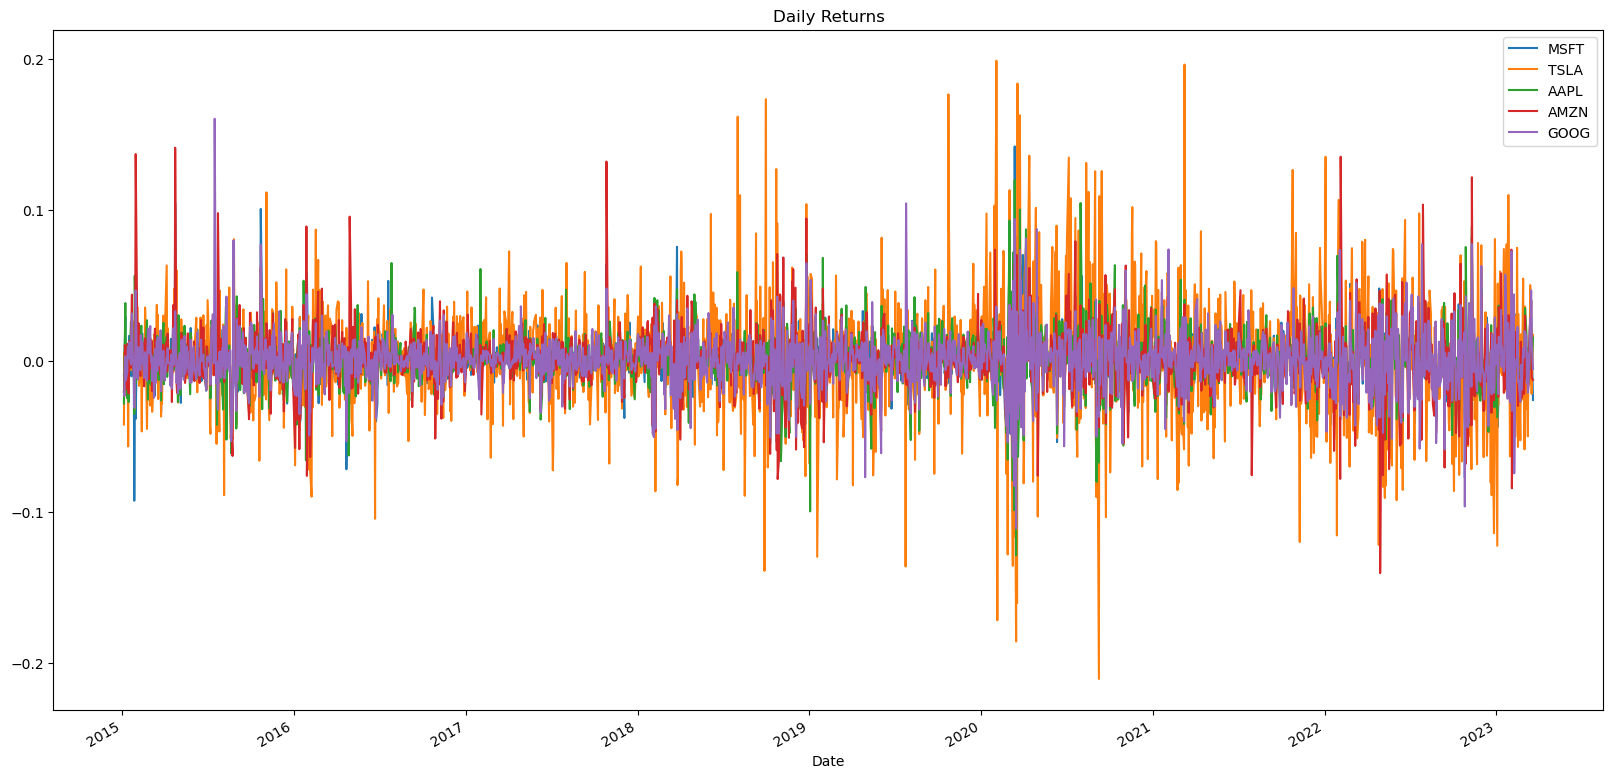

In [11]:
# Get daily percentage change
stocks_df = stocks_df.pct_change().dropna()

# Plot daily percentage change
stocks_df.plot(figsize=(20, 10), title="Daily Returns")

<AxesSubplot:title={'center':'Portfolio Risk'}>

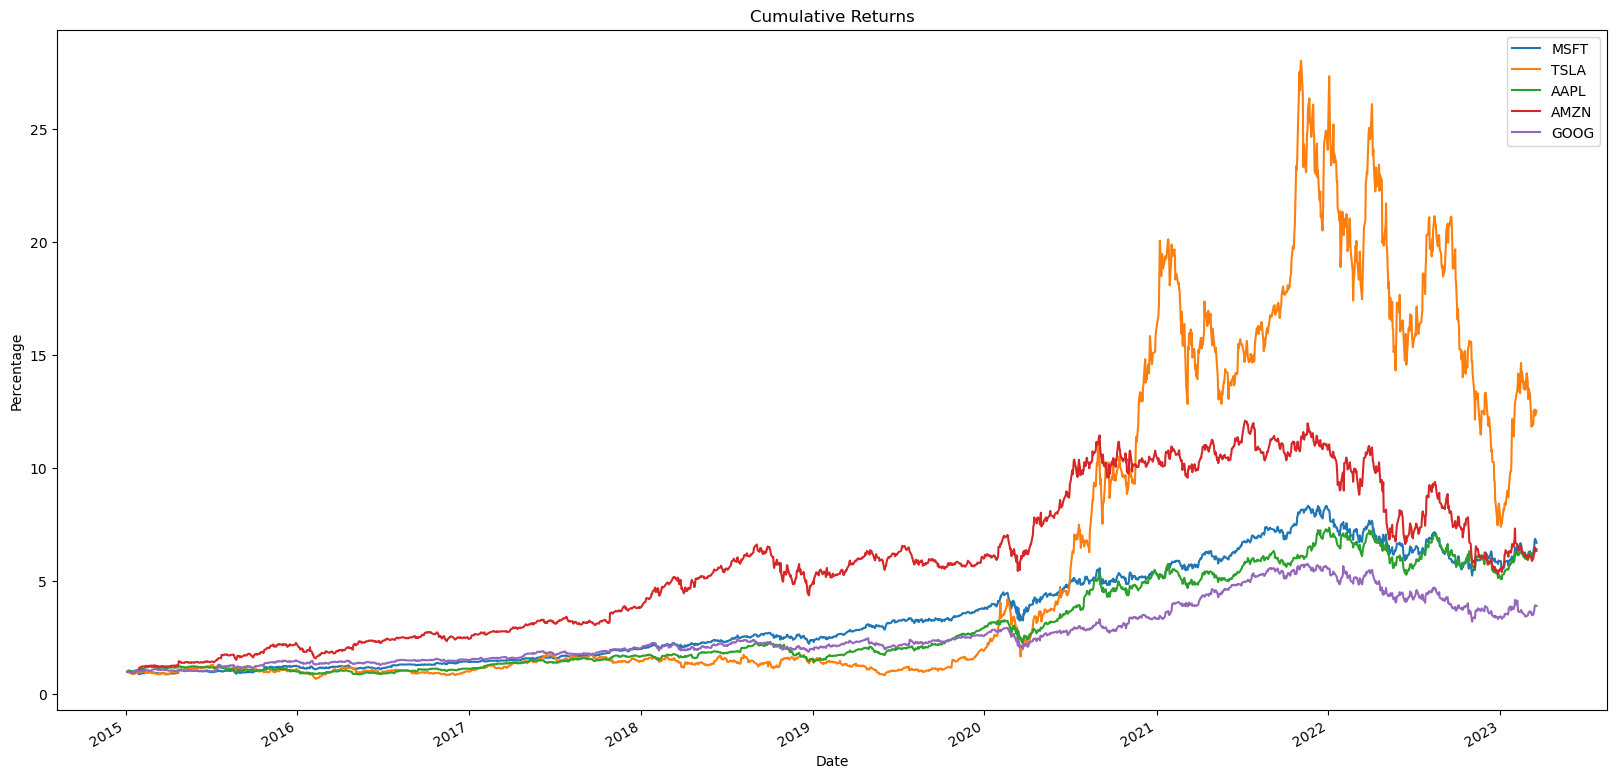

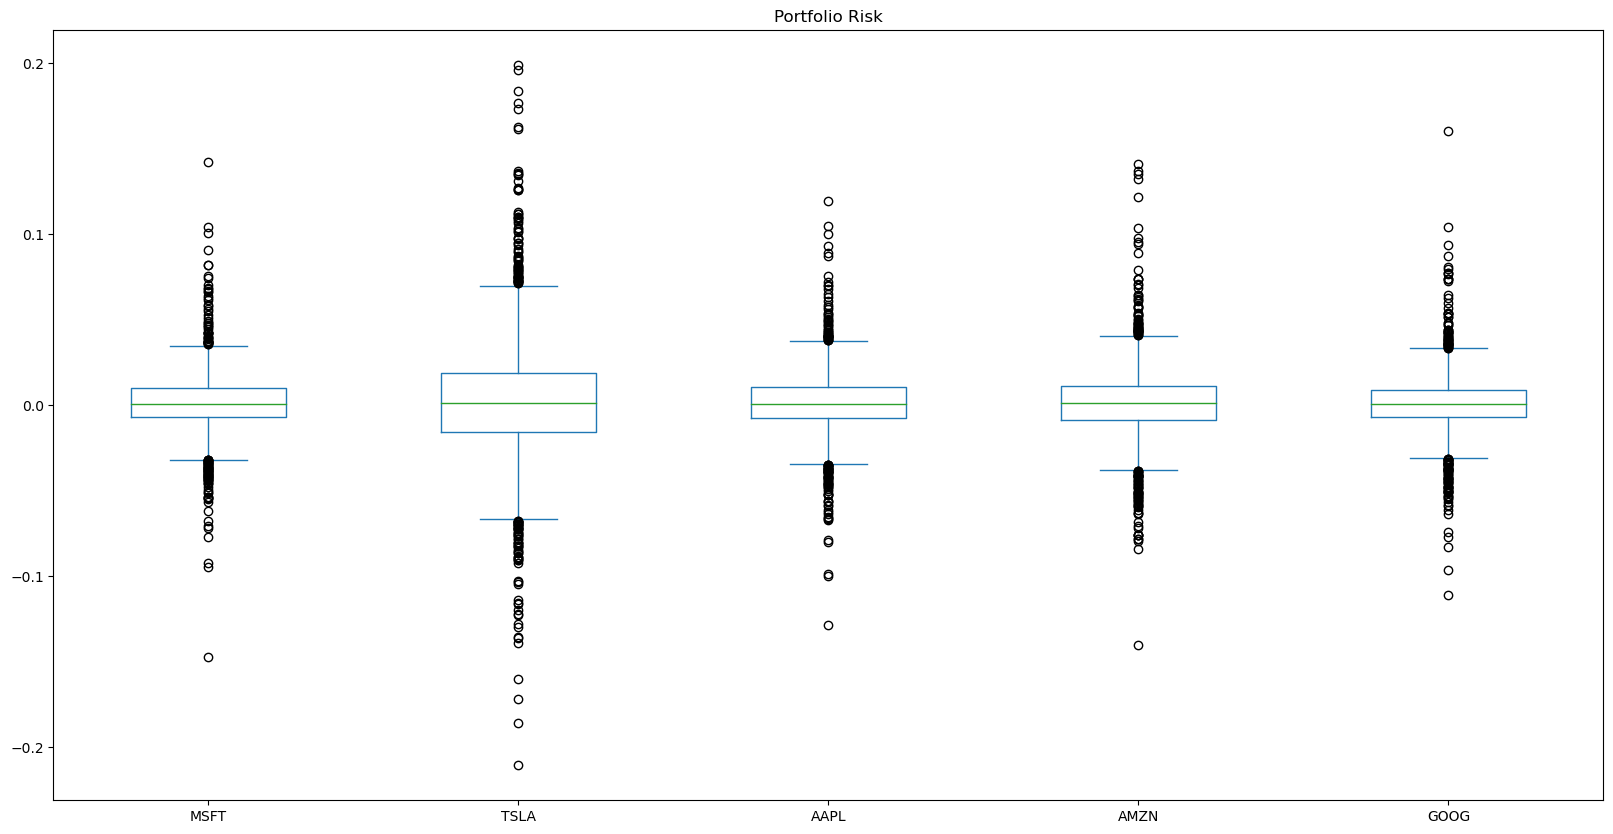

In [16]:
# Calculate cumulative returns
cumulative_returns = (1 + stocks_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns", ylabel='Percentage');

# Box plot to visually show risk
stocks_df.plot.box(figsize=(20, 10), title="Portfolio Risk")

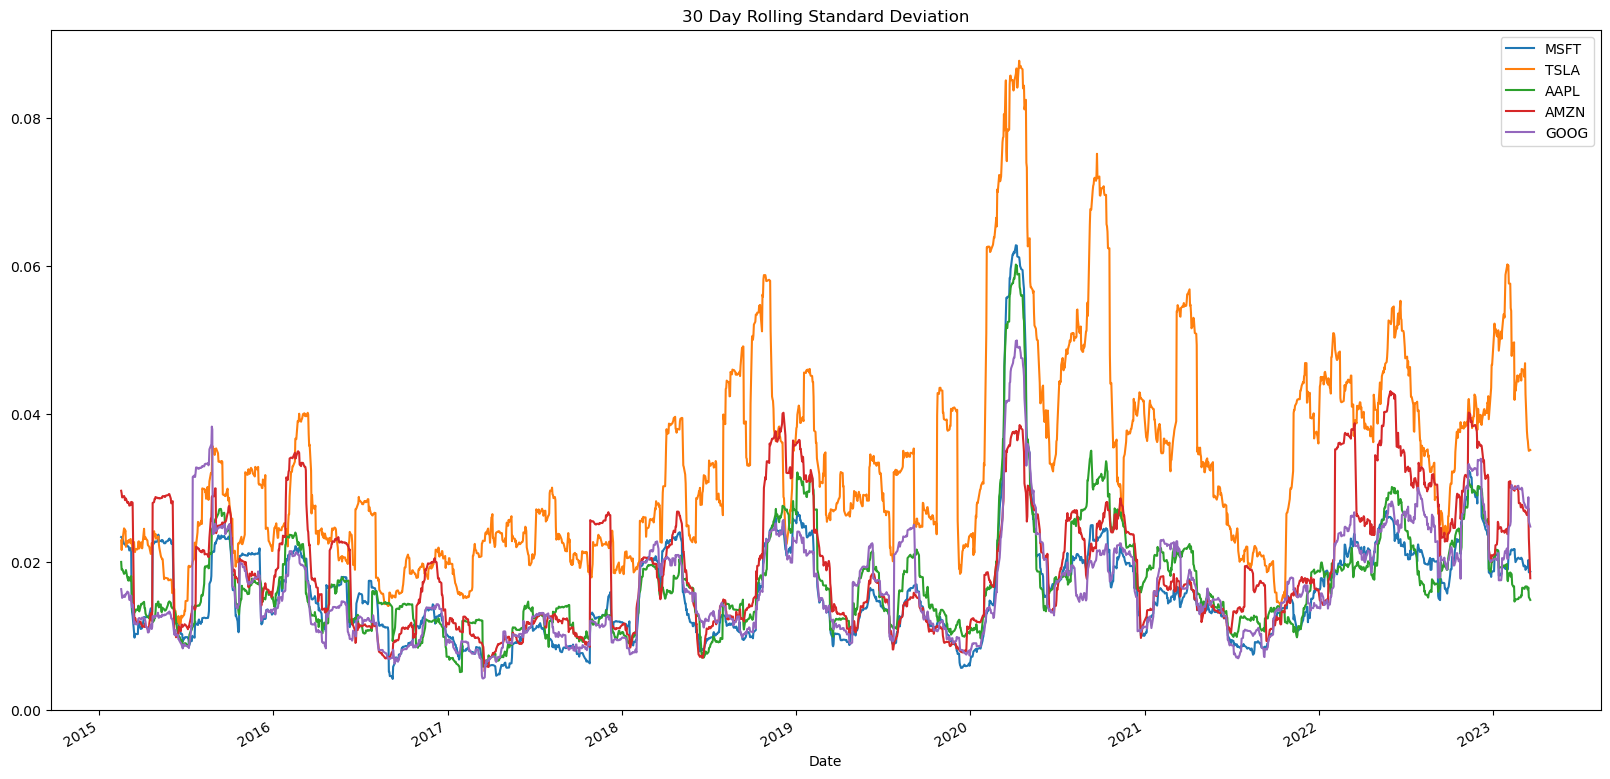

In [21]:
# Calculate standard deviation for each stock
stocks_df.std()

# Results:

# MSFT    0.014686
# TSLA    0.028312
# AAPL    0.015646
# AMZN    0.018426
# GOOG    0.015122
# dtype: float64

# Calculate annualized standard deviation (252 trading days)
stocks_df.std() * np.sqrt(252)

# Results:
# MSFT    0.233130
# TSLA    0.449436
# AAPL    0.248374
# AMZN    0.292501
# GOOG    0.240049
# dtype: float64

# Calculate and plot the rolling standard deviation for each stock using a 30 trading day window
stocks_df.rolling(window=30).std().plot(figsize=(20, 10), title="30 Day Rolling Standard Deviation");

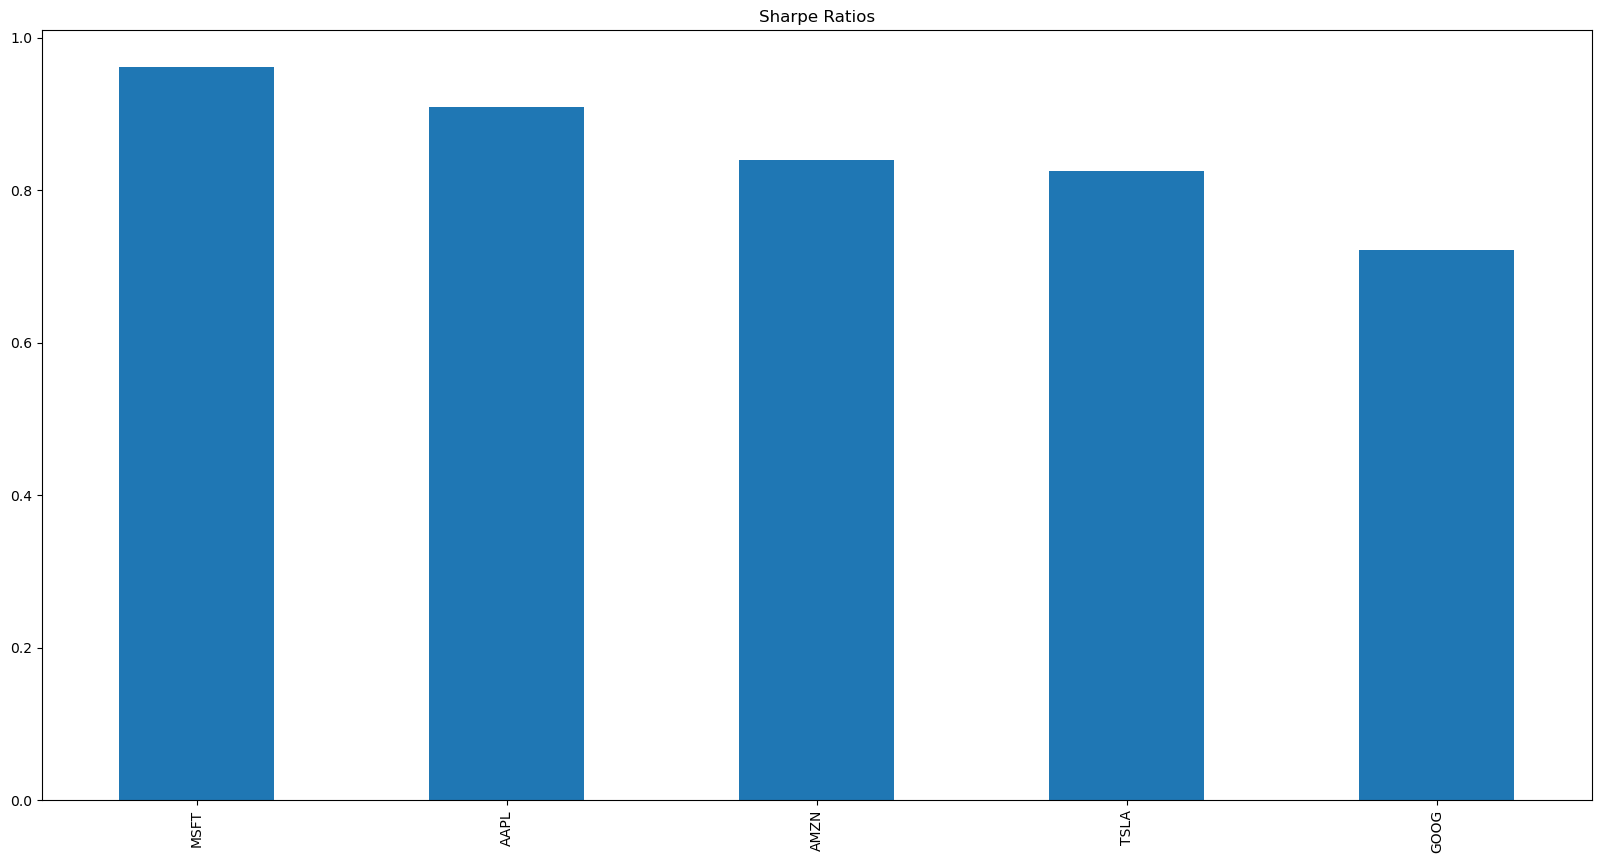

In [20]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (stocks_df.mean() * 252) / (stocks_df.std() * np.sqrt(252))
sharpe_ratios = sharpe_ratios.sort_values(ascending=False)
sharpe_ratios

# Results:

# AMZN    1.372067
# MSFT    1.254869
# AAPL    0.990570
# GOOG    0.902369
# TSLA    0.511901
# dtype: float64

# Visualize the Sharpe ratios as a bar plot
sharpe_ratios.plot(figsize=(20, 10), kind="bar", title="Sharpe Ratios");